In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_CdSe_augmented_adjusted.csv')
df

,Unnamed: 0.1,Unnamed: 0,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,diameter_nm,abs_nm,emission_nm,Unnamed: 53
0,0,0,1.102480,-0.438782,-0.245227,-0.525726,-0.417578,-0.166760,-0.124145,-0.302794,...,1,0,0,1,0,0,3.41,566.000000,575.00,9.000000
1,1,1,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.452738,-0.527398,-0.302794,...,1,0,0,1,0,0,1.99,440.784362,497.00,56.215638
2,2,2,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.446393,-0.527398,-0.302794,...,1,0,0,1,0,0,2.13,461.024362,510.00,48.975638
3,3,3,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.446393,-0.527398,-0.302794,...,1,0,0,1,0,0,2.27,500.036190,517.00,16.963810
4,4,4,0.325710,-0.473265,-0.588527,-0.525726,-0.499463,-0.446393,-0.527398,-0.302794,...,1,0,0,1,0,0,2.53,500.036190,522.00,21.963810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,222,222,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,0.219928,...,1,0,0,0,0,1,2.20,500.000000,535.50,35.500000
171,223,223,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,0.219928,...,1,0,0,0,0,1,2.80,545.000000,562.25,17.250000
172,224,224,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,0.219928,...,1,0,0,0,0,1,3.60,570.000000,590.35,20.350000
173,228,228,0.481064,-0.466369,-0.501557,-0.387095,-0.499463,-0.371514,-0.439424,5.968747,...,1,0,0,0,0,1,1.70,450.000000,517.50,67.500000


In [3]:
input_col = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)', 
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)', 
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate', 
             'x0_cadmium oxide', 'x0_cadmium stearate', 'x0_dimethylcadmium', 
             'x1_None', 'x1_benzoic acid', 'x1_dodecylphosphonic acid', 
             'x1_ethylphosphonic acid', 'x1_lauric acid', 
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline', 
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine', 
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine', 
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine', 
             'x3_tributylphosphine', 'x3_trioctylphosphine', 
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin', 
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide'
            ]


#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [09:04<00:00, 22.67s/it]

0.1751925925925926 2 23 20


In [7]:
ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=20)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr_d.predict(X_test_d))
D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)


from tabulate import tabulate

d = ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
    

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))



Outputs          R2    Mean absolute error    Mean squared error    Root mean squared error
---------  --------  ---------------------  --------------------  -------------------------
Diameter   0.928258               0.175193              0.066874                     0.2586


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:24<00:00,  7.04s/it]

0.21437901234567894 12 25 62


In [8]:
DT_regr_d = DecisionTreeRegressor(max_depth=12,
                                max_features=25,
                                random_state=62)
            
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr_d.predict(X_test_d))
            
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr_d.predict(X_test_d))
D_mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
D_r_2 = r2_score(Y_test_d, DT_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, DT_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, DT_Y_pred_d, squared=False)


from tabulate import tabulate

d = ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
    

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error    Root mean squared error
---------  --------  ---------------------  --------------------  -------------------------
Diameter   0.920359               0.214379             0.0742371                   0.272465


### 3D. Random Forest

In [6]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 40, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [05:10<00:00, 15.54s/it]

0.2426365432098766 11 5 29


### 4D. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:16<00:00,  2.31it/s]

0.2934314814814814 2 1


### Saving Decision Tree model

In [10]:
ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=20)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

joblib.dump(ET_regr_d, "./model_CdSe_SO_diameter_ExtraTrees.joblib")

['./model_CdSe_SO_diameter_ExtraTrees.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [11]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [09:13<00:00, 23.04s/it]

11.948842592592591 8 2 13


In [11]:
ET_regr_e = ExtraTreesRegressor(n_estimators=8, 
                                            max_features=2,
                                            random_state=13)
            
ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))
D_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
D_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
D_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
D_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


from tabulate import tabulate

d = ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
    

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error    Root mean squared error
---------  --------  ---------------------  --------------------  -------------------------
Diameter   0.712964                11.9488               459.214                    21.4293


### 2E. Decision Trees

In [12]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 70, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:55<00:00,  6.04s/it]

8.373533950617288 13 5 32


In [10]:
DT_regr_e = DecisionTreeRegressor(max_depth=13,
                                max_features=5,
                                random_state=32)
            
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))
            
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))
D_mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
D_r_2 = r2_score(Y_test_e, DT_Y_pred_e)
D_mse = mean_squared_error(Y_test_e, DT_Y_pred_e)
D_rmse = mean_squared_error(Y_test_e, DT_Y_pred_e, squared=False)


from tabulate import tabulate

d = ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
    

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs          R2    Mean absolute error    Mean squared error    Root mean squared error
---------  --------  ---------------------  --------------------  -------------------------
Diameter   0.912234                8.37353               140.412                    11.8496


### 3E. Random Forest

In [15]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 30, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [03:02<00:00,  9.12s/it]

12.88962962962964 13 5 11


### 4E. K Neighbors

In [16]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:15<00:00,  2.47it/s]

17.27777777777778 2 7


### Saving Extra Trees model

In [17]:
DT_regr_e = DecisionTreeRegressor(max_depth=13,
                                max_features=5,
                                random_state=32)
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

joblib.dump(ET_regr_e, "./model_CdSe_SO_emission_DecisionTree.joblib")

['./model_CdSe_SO_emission_DecisionTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [18]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [12:49<00:00, 26.54s/it]

15.021156843209878 3 28 12


In [12]:
ET_regr_a = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=28,
                                            random_state=12)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))
D_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
D_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
D_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
D_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
    

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error    Root mean squared error
---------  --------  ---------------------  --------------------  -------------------------
Diameter   0.872221                15.0212               448.564                    21.1793


### 2A. Decision Trees


In [4]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:13<00:00,  6.68s/it]

14.66973166814815 11 11 38


In [13]:
DT_regr_a = DecisionTreeRegressor(max_depth=11,
                                max_features=11,
                                random_state=38)
            
DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))
            
DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))
D_mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
D_r_2 = r2_score(Y_test_a, DT_Y_pred_a)
D_mse = mean_squared_error(Y_test_a, DT_Y_pred_a)
D_rmse = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)


from tabulate import tabulate

d = ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
    

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs          R2    Mean absolute error    Mean squared error    Root mean squared error
---------  --------  ---------------------  --------------------  -------------------------
Diameter   0.888377                14.6697                391.85                    19.7952


### 3A. Random Forest

In [8]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 31, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [03:44<00:00, 11.25s/it]

18.04832381866549 11 2 20


### 4A. K Neighbors

In [9]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:13<00:00,  2.84it/s]

24.043626992592593 2 1


### Saving model

In [10]:
DT_regr_a = DecisionTreeRegressor(max_depth=11,
                                max_features=11,
                                random_state=38)
DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

joblib.dump(DT_regr_a, "./model_CdSe_SO_abs_DecisionTree.joblib")

['./model_CdSe_SO_DecisionTree_abs.joblib']

## Analyzing

In [13]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=20)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr_d.predict(X_test_d))

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

DT_regr_e = DecisionTreeRegressor(max_depth=13,
                                max_features=5,
                                random_state=32)
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

E_mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
E_r_2 = r2_score(Y_test_e, DT_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, DT_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, DT_Y_pred_e, squared=False)


### Absorption

DT_regr_a = DecisionTreeRegressor(max_depth=11,
                                max_features=11,
                                random_state=38).fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = DT_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
A_r_2 = r2_score(Y_test_a, DT_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, DT_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.928258               0.175193              0.066874                     0.2586
Absorption  0.888377              14.6697              391.85                        19.7952
Emission    0.912234               8.37353             140.412                       11.8496


In [7]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=20)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

DT_regr_e = DecisionTreeRegressor(max_depth=13,
                                max_features=5,
                                random_state=32)
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e =DT_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
E_r_2 = r2_score(Y_test_e, DT_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, DT_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, DT_Y_pred_e, squared=False)


### Absorption

DT_regr_a = DecisionTreeRegressor(max_depth=11,
                                max_features=11,
                                random_state=38).fit(X_train_a, np.ravel(Y_train_a))
DT_Y_pred_a = DT_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
A_r_2 = r2_score(Y_test_a, DT_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, DT_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.928258               0.175193              0.066874                     0.2586
Absorption  0.888377              14.6697              391.85                        19.7952
Emission    0.912234               8.37353             140.412                       11.8496


In [8]:
from numpy import std, absolute, mean

def interval(data, confidence):
    MAD = mean(absolute(data - mean(data)))*confidence
    return MAD


In [11]:
MAD_d = interval(ET_Y_pred_d, 0.95)
MAD_e = interval(DT_Y_pred_e, 0.95)
MAD_a = interval(DT_Y_pred_a, 0.95)

print("Diameter: ", MAD_d, "; Emission: ", MAD_e, "; absorption: ", MAD_a)

Diameter:  0.7597935802469136 ; Emission:  31.702584876543227 ; absorption:  50.13287207079561


InvalidIndexError: (slice(None, None, None), None)

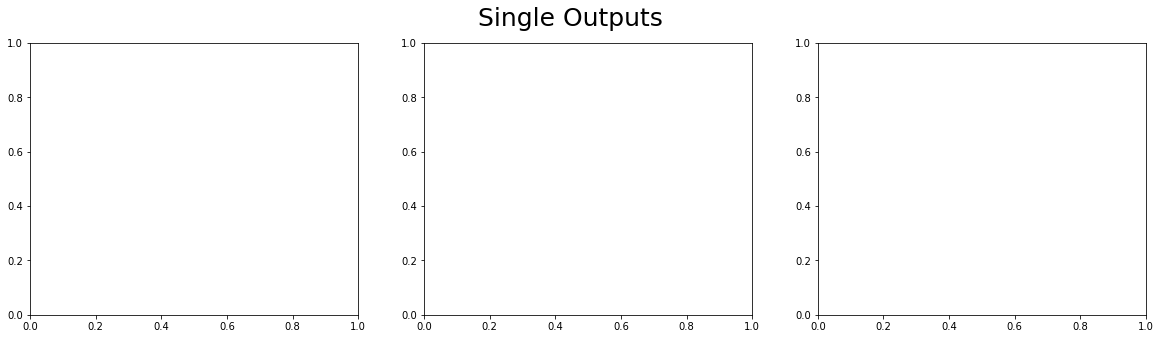

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6],[1,6], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, DT_Y_pred_a,'o')
ax2.plot([350,650],[350,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, DT_Y_pred_e,'o')
ax3.plot([450,650],[450,650], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [27]:
importance_dict_d = dict()
for i in range(0,48):
    importance_dict_d[input_col[i]] = ET_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('Time_min (min)', 0.23616903935942368),
 ('Growth Temp (Celsius)', 0.22168617386660372),
 ('Chalcogen_mmol (mmol)', 0.13210646999539158),
 ('Phosphines_mmol (mmol)', 0.07740409511643384),
 ('x1_benzoic acid', 0.06150986698037372),
 ('Metal_mmol (mmol)', 0.06079572792362309),
 ('S_I_amount (g)', 0.04592469656610114),
 ('x4_octadecene', 0.03372207952609167),
 ('x4_trioctylphosphine oxide', 0.02325165686592775),
 ('Amines_mmol (mmol)', 0.020289431848583155),
 ('x0_cadmium acetate dihydrate', 0.014085558389559629),
 ('x1_oleic acid', 0.01233833103930937),
 ('x1_stearic acid', 0.009379024447579782),
 ('x4_liquid parafin', 0.007196724152852458),
 ('S_II_amount (g)', 0.006672596280441475),
 ('x2_hexadecylamine', 0.0061357653758558565),
 ('CA_mmol (mmol)', 0.005408901176890191),
 ('x2_dodecylamine', 0.005332293565364408),
 ('x0_dimethylcadmium', 0.004640409454652211),
 ('x5_trioctylphosphine oxide', 0.002846274830315831),
 ('x3_trioctylphosphine', 0.002757664647518152),
 ('x0_cadmium oxide',

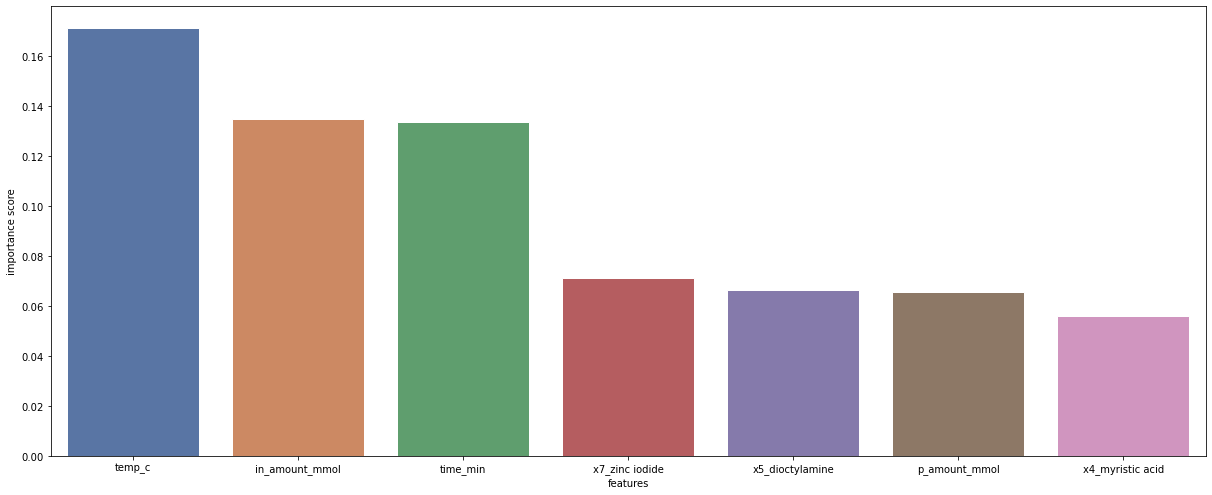

In [13]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [28]:
importance_dict_e = dict()
for i in range(0,48):
    importance_dict_e[input_col[i]] = DT_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('Time_min (min)', 0.37810493264420847),
 ('x4_phenyl ether', 0.1619948162211977),
 ('Amines_mmol (mmol)', 0.12399469479555633),
 ('Metal_mmol (mmol)', 0.05318465625942061),
 ('x1_oleic acid', 0.05179356500451521),
 ('Growth Temp (Celsius)', 0.04484354331679388),
 ('x1_ethylphosphonic acid', 0.027960947936522602),
 ('CA_mmol (mmol)', 0.02418577168419052),
 ('S_I_amount (g)', 0.018481613323578474),
 ('x3_diphenylphosphine', 0.014460318075851275),
 ('Phosphines_mmol (mmol)', 0.012933748499746161),
 ('x3_None', 0.01184747896331015),
 ('Chalcogen_mmol (mmol)', 0.011386705625700135),
 ('x0_cadmium oxide', 0.010783410471534657),
 ('x1_None', 0.010202888988118901),
 ('x2_hexadecylamine', 0.00981761599336164),
 ('x2_None', 0.00841023552798723),
 ('x4_trioctylphosphine oxide', 0.006160763763738983),
 ('x3_tributylphosphine', 0.004866486257133958),
 ('S_II_amount (g)', 0.004519173055277889),
 ('x5_None', 0.0032946514157128786),
 ('x5_trioctylphosphine oxide', 0.0027168880418442774),
 ('x3_trioc

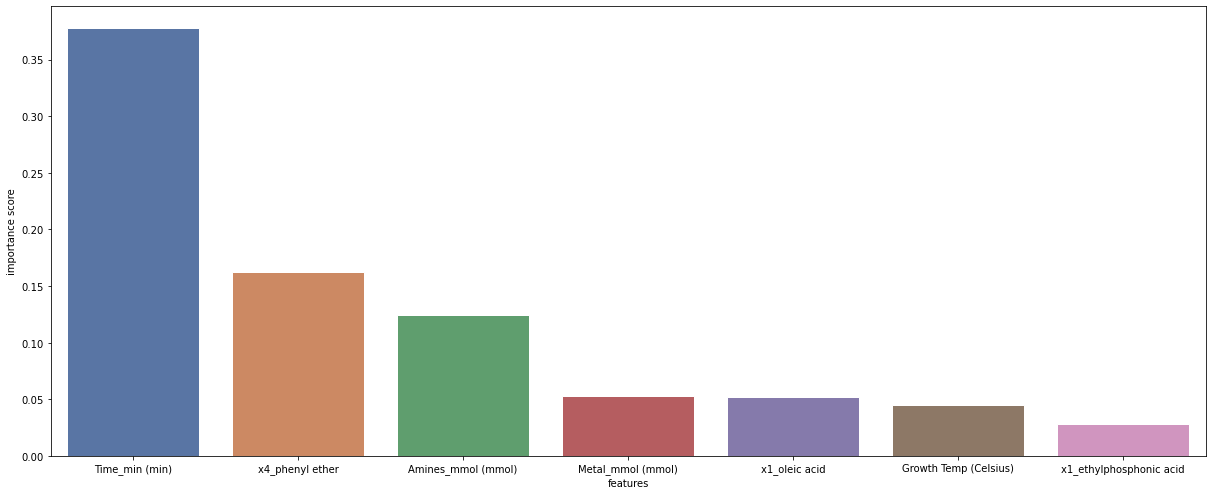

In [29]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [30]:
importance_dict_a = dict()
for i in range(0,48):
    importance_dict_a[input_col[i]] = DT_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('Growth Temp (Celsius)', 0.5176058166596668),
 ('Time_min (min)', 0.2646604828905983),
 ('CA_mmol (mmol)', 0.07036645190790843),
 ('Metal_mmol (mmol)', 0.03497618496481159),
 ('x3_None', 0.020866340368920506),
 ('Phosphines_mmol (mmol)', 0.016483859826592808),
 ('Chalcogen_mmol (mmol)', 0.013749916727325381),
 ('x1_None', 0.01097354279303769),
 ('x1_myrstic acid', 0.010769009039556127),
 ('x0_cadmium acetate', 0.009444939210170587),
 ('S_II_amount (g)', 0.005874374704228669),
 ('S_I_amount (g)', 0.004877549159990379),
 ('x0_cadmium oxide', 0.0038733368850217133),
 ('x3_trioctylphosphine', 0.0032169049562696794),
 ('x4_octadecene', 0.002769474990140516),
 ('x1_stearic acid', 0.0024222813324844376),
 ('x2_dodecylamine', 0.0019573019818202304),
 ('x5_trioctylphosphine oxide', 0.0014887411281391293),
 ('x2_None', 0.0010468647567731767),
 ('x0_cadmium stearate', 0.0006727021300498792),
 ('x5_phosphinic acid', 0.00043860594127480116),
 ('x2_hexadecylamine', 0.00043715170572314),
 ('x3_trib

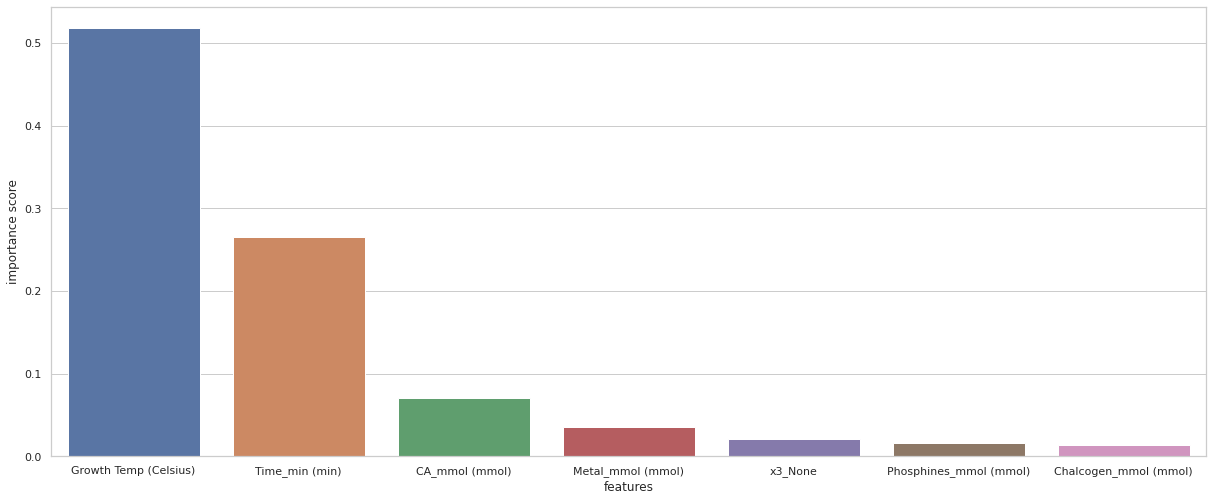

In [31]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [32]:
importance_dict_a

{'Growth Temp (Celsius)': 0.5176058166596668,
 'Metal_mmol (mmol)': 0.03497618496481159,
 'Chalcogen_mmol (mmol)': 0.013749916727325381,
 'Amines_mmol (mmol)': 0.0,
 'CA_mmol (mmol)': 0.07036645190790843,
 'Phosphines_mmol (mmol)': 0.016483859826592808,
 'S_I_amount (g)': 0.004877549159990379,
 'S_II_amount (g)': 0.005874374704228669,
 'Time_min (min)': 0.2646604828905983,
 'x0_cadmium acetate': 0.009444939210170587,
 'x0_cadmium acetate dihydrate': 1.2624867580939254e-06,
 'x0_cadmium oxide': 0.0038733368850217133,
 'x0_cadmium stearate': 0.0006727021300498792,
 'x0_dimethylcadmium': 0.0,
 'x1_None': 0.01097354279303769,
 'x1_benzoic acid': 0.0,
 'x1_dodecylphosphonic acid': 0.0,
 'x1_ethylphosphonic acid': 7.785904282985529e-06,
 'x1_lauric acid': 0.0,
 'x1_myrstic acid': 0.010769009039556127,
 'x1_oleic acid': 0.00023689684016619855,
 'x1_stearic acid': 0.0024222813324844376,
 'x2_2-6-dimethylpyridine': 0.0,
 'x2_None': 0.0010468647567731767,
 'x2_aniline': 0.0,
 'x2_benzylamine': 0

### Combine


In [33]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [34]:
sorted_d 

[('Amines_mmol (mmol)', 0.020289431848583155),
 ('CA_mmol (mmol)', 0.005408901176890191),
 ('Chalcogen_mmol (mmol)', 0.13210646999539158),
 ('Growth Temp (Celsius)', 0.22168617386660372),
 ('Metal_mmol (mmol)', 0.06079572792362309),
 ('Phosphines_mmol (mmol)', 0.07740409511643384),
 ('S_II_amount (g)', 0.006672596280441475),
 ('S_I_amount (g)', 0.04592469656610114),
 ('Time_min (min)', 0.23616903935942368),
 ('x0_cadmium acetate', 0.0),
 ('x0_cadmium acetate dihydrate', 0.014085558389559629),
 ('x0_cadmium oxide', 0.0025481020357590953),
 ('x0_cadmium stearate', 0.0),
 ('x0_dimethylcadmium', 0.004640409454652211),
 ('x1_None', 0.0016013484609011359),
 ('x1_benzoic acid', 0.06150986698037372),
 ('x1_dodecylphosphonic acid', 0.0),
 ('x1_ethylphosphonic acid', 5.980730681307533e-06),
 ('x1_lauric acid', 8.278195329343746e-06),
 ('x1_myrstic acid', 8.947465124435988e-05),
 ('x1_oleic acid', 0.01233833103930937),
 ('x1_stearic acid', 0.009379024447579782),
 ('x2_2-6-dimethylpyridine', 0.0),

In [35]:
combined_importance = dict()

In [37]:
for i in range(0,48):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'Amines_mmol (mmol)': 0.14428412664413948,
 'CA_mmol (mmol)': 0.09996112476898913,
 'Chalcogen_mmol (mmol)': 0.1572430923484171,
 'Growth Temp (Celsius)': 0.7841355338430643,
 'Metal_mmol (mmol)': 0.1489565691478553,
 'Phosphines_mmol (mmol)': 0.10682170344277281,
 'S_II_amount (g)': 0.017066144039948033,
 'S_I_amount (g)': 0.06928385904967,
 'Time_min (min)': 0.8789344548942305,
 'x0_cadmium acetate': 0.009444939210170587,
 'x0_cadmium acetate dihydrate': 0.014086820876317723,
 'x0_cadmium oxide': 0.017204849392315466,
 'x0_cadmium stearate': 0.0006727021300498792,
 'x0_dimethylcadmium': 0.004640409454652211,
 'x1_None': 0.02277778024205773,
 'x1_benzoic acid': 0.06150986698037372,
 'x1_dodecylphosphonic acid': 0.0,
 'x1_ethylphosphonic acid': 0.027974714571486894,
 'x1_lauric acid': 8.278195329343746e-06,
 'x1_myrstic acid': 0.010858483690800487,
 'x1_oleic acid': 0.06436879288399078,
 'x1_stearic acid': 0.012647874042194258,
 'x2_2-6-dimethylpyridine': 0.0,
 'x2_None': 0.0107717384

In [38]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('Time_min (min)', 0.8789344548942305),
 ('Growth Temp (Celsius)', 0.7841355338430643),
 ('x4_phenyl ether', 0.16206871741441312),
 ('Chalcogen_mmol (mmol)', 0.1572430923484171),
 ('Metal_mmol (mmol)', 0.1489565691478553),
 ('Amines_mmol (mmol)', 0.14428412664413948),
 ('Phosphines_mmol (mmol)', 0.10682170344277281),
 ('CA_mmol (mmol)', 0.09996112476898913),
 ('S_I_amount (g)', 0.06928385904967),
 ('x1_oleic acid', 0.06436879288399078),
 ('x1_benzoic acid', 0.06150986698037372),
 ('x4_octadecene', 0.03649155451623219),
 ('x3_None', 0.0341716567916825),
 ('x4_trioctylphosphine oxide', 0.02941242062966673),
 ('x1_ethylphosphonic acid', 0.027974714571486894),
 ('x1_None', 0.02277778024205773),
 ('x0_cadmium oxide', 0.017204849392315466),
 ('S_II_amount (g)', 0.017066144039948033),
 ('x2_hexadecylamine', 0.016390533074940636),
 ('x3_diphenylphosphine', 0.014758025558655765),
 ('x0_cadmium acetate dihydrate', 0.014086820876317723),
 ('x1_stearic acid', 0.012647874042194258),
 ('x1_myrstic 

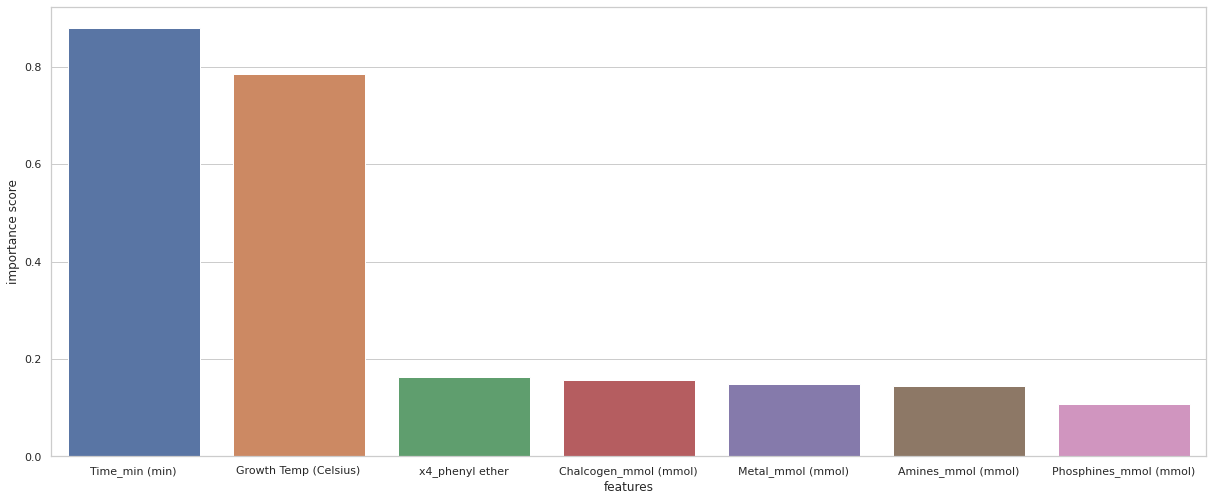

In [39]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)